## Simple Linear Regression

In [2]:
import seaborn as sns

In [3]:
diamonds = sns.load_dataset('diamonds')

In [4]:
diamonds.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [5]:
diamonds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


In [6]:
diamonds.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [7]:
X = diamonds[["carat", "depth", "table", "x", "y", "z"]]
y = diamonds["price"]

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [10]:
X_train.describe()

,carat,depth,table,x,y,z
count,37758.000000,37758.000000,37758.000000,37758.000000,37758.000000,37758.000000
mean,0.800350,61.749952,57.459021,5.737192,5.740036,3.541996
std,0.473793,1.432578,2.240579,1.122315,1.121888,0.695301
min,0.200000,43.000000,43.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,4.720000,4.720000,2.910000
50%,0.710000,61.800000,57.000000,5.700000,5.720000,3.530000
75%,1.050000,62.500000,59.000000,6.540000,6.540000,4.040000
max,4.500000,79.000000,95.000000,10.230000,31.800000,6.720000


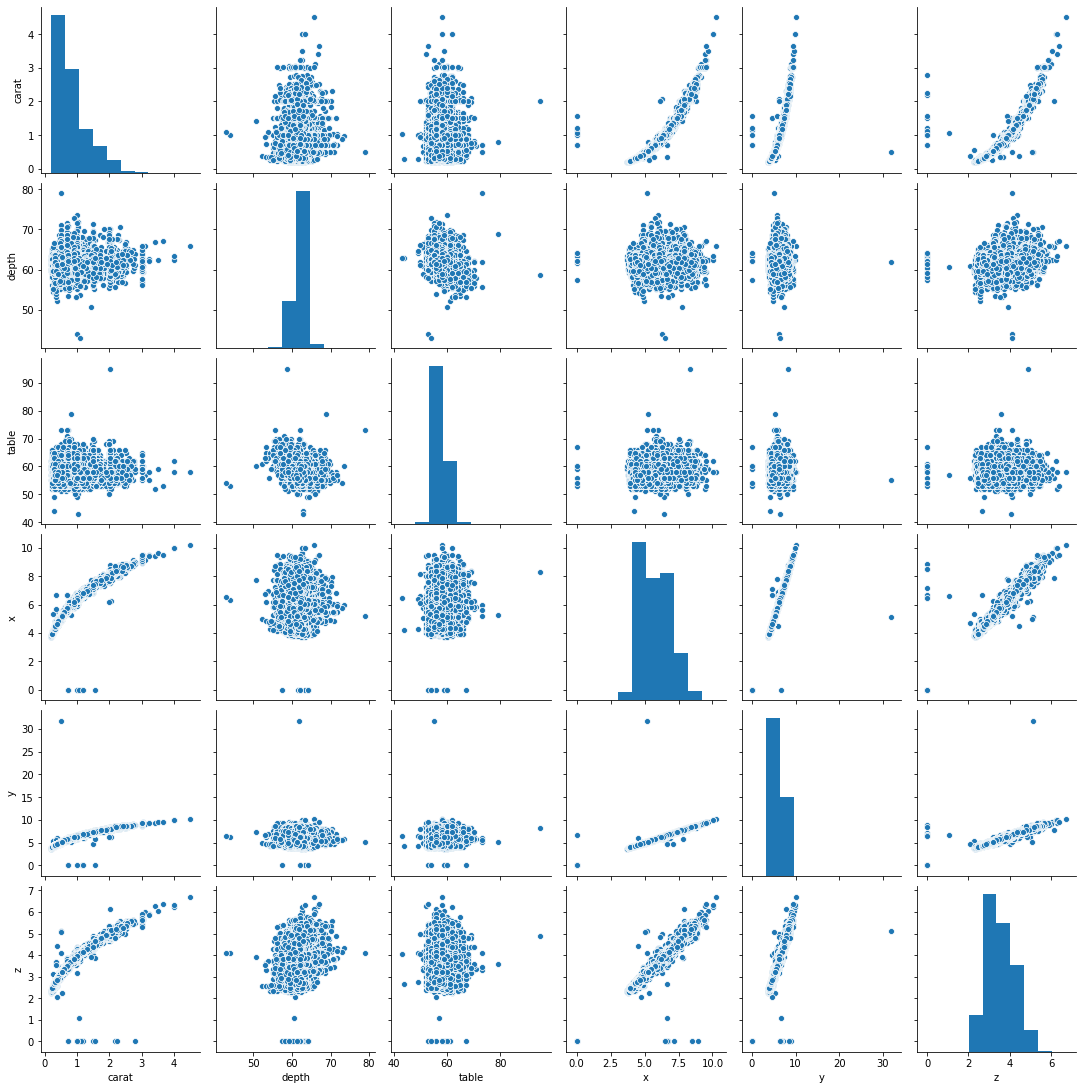

In [11]:
sns.pairplot(X_train)

In [12]:
from sklearn.preprocessing import StandardScaler

In [13]:
st_scaler = StandardScaler()

In [14]:
st_scaler.fit(X_train)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [15]:
X_train_scaled = st_scaler.transform(X_train)

In [16]:
import pandas as pd

In [17]:
pd.DataFrame(X_train_scaled, columns=X_train.columns).describe()

,carat,depth,table,x,y,z
count,3.775800e+04,3.775800e+04,3.775800e+04,3.775800e+04,3.775800e+04,3.775800e+04
mean,6.275680e-16,-3.769780e-15,2.756739e-15,2.666014e-16,7.067079e-16,-4.145856e-16
std,1.000013e+00,1.000013e+00,1.000013e+00,1.000013e+00,1.000013e+00,1.000013e+00
min,-1.267131e+00,-1.308844e+01,-6.453338e+00,-5.111992e+00,-5.116474e+00,-5.094260e+00
25%,-8.450002e-01,-5.235055e-01,-6.511888e-01,-9.063451e-01,-9.092255e-01,-9.089656e-01
50%,-1.906973e-01,3.493586e-02,-2.048697e-01,-3.313871e-02,-1.785943e-02,-1.725338e-02
75%,5.269252e-01,5.235720e-01,6.877686e-01,7.153239e-01,7.130608e-01,7.162518e-01
max,7.808683e+00,1.204142e+01,1.675526e+01,4.003213e+00,2.322897e+01,4.570750e+00


In [18]:
from sklearn.linear_model import LinearRegression
lin = LinearRegression()
lin.fit(X_train_scaled, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [19]:
print(lin.intercept_)

3928.688993061074


In [20]:
pd.DataFrame(lin.coef_, X.columns, columns=["Coefficient"])

,Coefficient
carat,4960.357093
depth,-286.048071
table,-228.699208
x,-1682.235637
y,394.716671
z,1.792135


In [21]:
X_test

,carat,depth,table,x,y,z
28517,0.32,62.2,57.0,4.35,4.37,2.71
36230,0.38,61.6,59.0,4.62,4.66,2.86
26149,1.64,61.8,53.0,7.62,7.63,4.71
14042,0.26,62.4,56.0,4.11,4.14,2.57
13875,1.13,62.0,57.0,6.68,6.62,4.12
...,...,...,...,...,...,...
25536,2.14,62.9,56.0,8.18,8.14,5.13
2848,0.90,61.4,55.0,6.19,6.28,3.83
27938,0.31,63.3,58.0,4.35,4.34,2.75
42237,0.54,63.3,56.0,5.21,5.24,3.31


In [22]:
X_test_scaled = st_scaler.transform(X_test)

In [23]:
pd.DataFrame(X_test_scaled, columns=X_test.columns).describe()

,carat,depth,table,x,y,z
count,16182.000000,16182.000000,16182.000000,16182.000000,16182.000000,16182.000000
mean,-0.006952,0.002544,-0.001747,-0.009325,-0.007020,-0.011478
std,1.004083,1.020741,1.004307,1.004647,1.064310,0.987587
min,-1.265085,-13.168745,-6.478912,-5.119051,-5.122019,-4.999432
25%,-0.842635,-0.525616,-0.653501,-0.923321,-0.916826,-0.905208
50%,-0.208959,0.036301,-0.205392,-0.039539,-0.032932,-0.029892
75%,0.509207,0.527978,0.690825,0.710336,0.708111,0.690127
max,6.782598,11.555597,9.652996,3.933015,47.465214,6.379686


In [24]:
y_predictions = lin.predict(X_test_scaled)

In [25]:
import matplotlib.pyplot as plt

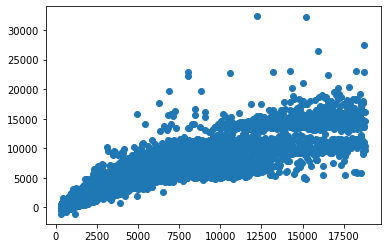

In [26]:
plt.scatter(y_test, y_predictions)
plt.show()

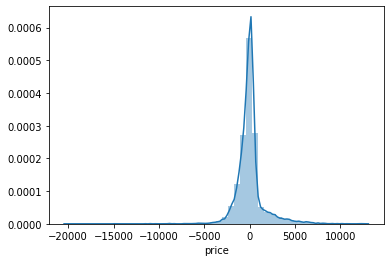

In [27]:
sns.distplot((y_test-y_predictions), bins=50)

In [30]:
from sklearn import metrics
import numpy as np

In [31]:
print("RMSE: ", np.sqrt(metrics.mean_squared_error(y_test, y_predictions)))
print("MAE: ", metrics.mean_absolute_error(y_test, y_predictions))

RMSE:  1517.027571254052
MAE:  895.6960534887581


## (Somewhat) Advanced Linear Regression

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [19]:
diamonds = sns.load_dataset('diamonds')

In [20]:
diamonds.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [21]:
cut = pd.get_dummies(diamonds["cut"], drop_first=True)
color = pd.get_dummies(diamonds["color"], drop_first=True)
clarity = pd.get_dummies(diamonds["clarity"], drop_first=True)

In [22]:
diamonds.drop(["cut", "color", "clarity"], axis=1, inplace=True)

In [23]:
data = pd.concat([diamonds, cut, color, clarity], axis=1)

In [24]:
data

,carat,depth,table,price,x,y,z,Good,Ideal,Premium,...,H,I,J,IF,SI1,SI2,VS1,VS2,VVS1,VVS2
0,0.23,61.5,55.0,326,3.95,3.98,2.43,0,1,0,...,0,0,0,0,0,1,0,0,0,0
1,0.21,59.8,61.0,326,3.89,3.84,2.31,0,0,1,...,0,0,0,0,1,0,0,0,0,0
2,0.23,56.9,65.0,327,4.05,4.07,2.31,1,0,0,...,0,0,0,0,0,0,1,0,0,0
3,0.29,62.4,58.0,334,4.20,4.23,2.63,0,0,1,...,0,1,0,0,0,0,0,1,0,0
4,0.31,63.3,58.0,335,4.34,4.35,2.75,1,0,0,...,0,0,1,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53935,0.72,60.8,57.0,2757,5.75,5.76,3.50,0,1,0,...,0,0,0,0,1,0,0,0,0,0
53936,0.72,63.1,55.0,2757,5.69,5.75,3.61,1,0,0,...,0,0,0,0,1,0,0,0,0,0
53937,0.70,62.8,60.0,2757,5.66,5.68,3.56,0,0,0,...,0,0,0,0,1,0,0,0,0,0
53938,0.86,61.0,58.0,2757,6.15,6.12,3.74,0,0,1,...,1,0,0,0,0,1,0,0,0,0


In [39]:
X = data.drop("price", axis=1)
y = data["price"]

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [41]:
st_scaler = StandardScaler()
st_scaler.fit(X_train)
X_train_scaled = st_scaler.transform(X_train)

In [42]:
lin = LinearRegression()
lin.fit(X_train_scaled, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [43]:
X_test_scaled = st_scaler.transform(X_test)
y_predict = lin.predict(X_test_scaled)

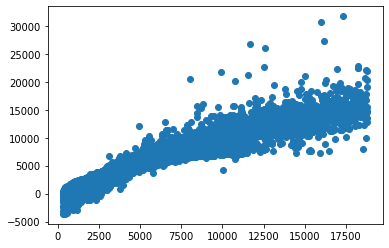

In [44]:
plt.scatter(y_test, y_predict)

In [45]:
print("RMSE: ", np.sqrt(metrics.mean_squared_error(y_test, y_predict)))
print("MAE: ", metrics.mean_absolute_error(y_test, y_predict))

RMSE:  1121.968681625984
MAE:  744.0056755511439


### PCA after feature creation

In [46]:
data

,carat,depth,table,price,x,y,z,Good,Ideal,Premium,...,H,I,J,IF,SI1,SI2,VS1,VS2,VVS1,VVS2
0,0.23,61.5,55.0,326,3.95,3.98,2.43,0,1,0,...,0,0,0,0,0,1,0,0,0,0
1,0.21,59.8,61.0,326,3.89,3.84,2.31,0,0,1,...,0,0,0,0,1,0,0,0,0,0
2,0.23,56.9,65.0,327,4.05,4.07,2.31,1,0,0,...,0,0,0,0,0,0,1,0,0,0
3,0.29,62.4,58.0,334,4.20,4.23,2.63,0,0,1,...,0,1,0,0,0,0,0,1,0,0
4,0.31,63.3,58.0,335,4.34,4.35,2.75,1,0,0,...,0,0,1,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53935,0.72,60.8,57.0,2757,5.75,5.76,3.50,0,1,0,...,0,0,0,0,1,0,0,0,0,0
53936,0.72,63.1,55.0,2757,5.69,5.75,3.61,1,0,0,...,0,0,0,0,1,0,0,0,0,0
53937,0.70,62.8,60.0,2757,5.66,5.68,3.56,0,0,0,...,0,0,0,0,1,0,0,0,0,0
53938,0.86,61.0,58.0,2757,6.15,6.12,3.74,0,0,1,...,1,0,0,0,0,1,0,0,0,0


In [47]:
X = data.drop("price", axis=1)
y = data["price"]

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [49]:
st_scaler = StandardScaler()

In [50]:
st_scaler.fit(X_train)
X_train_scaled = st_scaler.transform(X_train)

In [51]:
from sklearn.decomposition import PCA

In [52]:
pca = PCA(n_components=23)

In [53]:
pca.fit(X_train_scaled)

PCA(copy=True, iterated_power='auto', n_components=23, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [54]:
X_train_transformed = pca.transform(X_train_scaled)

In [55]:
lin = LinearRegression()

In [56]:
lin.fit(X_train_transformed, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [57]:
X_test_scaled = st_scaler.transform(X_test)
X_test_transformed = pca.transform(X_test_scaled)
y_predict = lin.predict(X_test_transformed)

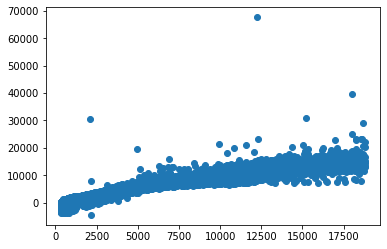

In [58]:
plt.scatter(y_test, y_predict)

In [59]:
print("RMSE: ", np.sqrt(metrics.mean_squared_error(y_test, y_predict)))
print("MAE: ", metrics.mean_absolute_error(y_test, y_predict))

RMSE:  1255.7825837801863
MAE:  751.5049601411187


# Polynomial Regression

In [25]:
data

,carat,depth,table,price,x,y,z,Good,Ideal,Premium,...,H,I,J,IF,SI1,SI2,VS1,VS2,VVS1,VVS2
0,0.23,61.5,55.0,326,3.95,3.98,2.43,0,1,0,...,0,0,0,0,0,1,0,0,0,0
1,0.21,59.8,61.0,326,3.89,3.84,2.31,0,0,1,...,0,0,0,0,1,0,0,0,0,0
2,0.23,56.9,65.0,327,4.05,4.07,2.31,1,0,0,...,0,0,0,0,0,0,1,0,0,0
3,0.29,62.4,58.0,334,4.20,4.23,2.63,0,0,1,...,0,1,0,0,0,0,0,1,0,0
4,0.31,63.3,58.0,335,4.34,4.35,2.75,1,0,0,...,0,0,1,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53935,0.72,60.8,57.0,2757,5.75,5.76,3.50,0,1,0,...,0,0,0,0,1,0,0,0,0,0
53936,0.72,63.1,55.0,2757,5.69,5.75,3.61,1,0,0,...,0,0,0,0,1,0,0,0,0,0
53937,0.70,62.8,60.0,2757,5.66,5.68,3.56,0,0,0,...,0,0,0,0,1,0,0,0,0,0
53938,0.86,61.0,58.0,2757,6.15,6.12,3.74,0,0,1,...,1,0,0,0,0,1,0,0,0,0


## Split and scaler

In [26]:
X = data.drop("price", axis=1)
y = data["price"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

st_scaler = StandardScaler()
st_scaler.fit(X_train)

X_train_scaled = st_scaler.transform(X_train)
X_test_scaled = st_scaler.transform(X_test)

## PCA

In [27]:
from sklearn.decomposition import PCA
pca = PCA(n_components=12)

#mit 80 prozent varianz

pca.fit(X_train_scaled)

X_train_transformed = pca.transform(X_train_scaled)
X_test_transformed = pca.transform(X_test_scaled)

In [28]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error


def create_polynomial_regression_model(degree):
  
    poly_features = PolynomialFeatures(degree=degree)
  
  # transforms the existing features to higher degree features.
    X_train_poly = poly_features.fit_transform(X_train_transformed)
  
  # fit the transformed features to Linear Regression

    poly_model = LinearRegression()
    poly_model.fit(X_train_poly, y_train)
  
  # predicting on training data-set
    y_train_predicted = poly_model.predict(X_train_poly)
  
  # predicting on test data-set
    y_test_predict = poly_model.predict(poly_features.fit_transform(X_test_transformed))
  
  # evaluating the model on training dataset
    rmse_train = np.sqrt(mean_squared_error(y_train, y_train_predicted))
    r2_train = r2_score(y_train, y_train_predicted)
    mae_train = mean_absolute_error(y_train, y_train_predicted)
  
  # evaluating the model on test dataset
    rmse_test = np.sqrt(mean_squared_error(y_test, y_test_predict))
    r2_test = r2_score(y_test, y_test_predict)
    mae_test = mean_absolute_error(y_test, y_test_predict)

    print("The model performance for the training set with degree: ", degree)
    print("-------------------------------------------")
    print("RMSE of training set is {}".format(rmse_train))
    print("R2 score of training set is {}".format(r2_train))
    print("MAE is {}".format(mae_train))
    print("\n")

    print("The model performance for the test set with degree: ", degree )
    print("-------------------------------------------")
    print("RMSE of test set is {}".format(rmse_test))
    print("R2 score of test set is {}".format(r2_test))
    print("MAE is {}".format(mae_test))
    print("\n")
    print("\n")
    print("\n")


In [29]:
degrees = [1,2,3,4,5]

for d in degrees:
    create_polynomial_regression_model(d)

The model performance for the training set with degree:  1
-------------------------------------------
RMSE of training set is 1941.4333702205572
R2 score of training set is 0.7627530962161894
MAE is 1375.9223289210013


The model performance for the test set with degree:  1
-------------------------------------------
RMSE of test set is 1959.1338152587323
R2 score of test set is 0.7598257167464549
MAE is 1370.042287247






The model performance for the training set with degree:  2
-------------------------------------------
RMSE of training set is 1287.173610097637
R2 score of training set is 0.8957130833454345
MAE is 812.2911844029578


The model performance for the test set with degree:  2
-------------------------------------------
RMSE of test set is 1801.8426105091403
R2 score of test set is 0.7968428985502076
MAE is 821.1485427318752






The model performance for the training set with degree:  3
-------------------------------------------
RMSE of training set is 695.82931209